In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

# 전처리

### 기호 삭제

In [3]:
ce_dwr = pd.read_csv('./magazine/final/ce_dwr.csv', sep='|', encoding = 'utf-8')

In [288]:
ce_dw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 763
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   magazine       764 non-null    object
 1   brand          764 non-null    object
 2   category       764 non-null    object
 3   title          764 non-null    object
 4   link           764 non-null    object
 5   date           764 non-null    object
 6   contents       764 non-null    object
 7   title_brand    764 non-null    int64 
 8   check          764 non-null    int64 
 9   why            120 non-null    object
 10  word_celine    764 non-null    object
 11  sentences_tag  764 non-null    object
 12  ADFN           764 non-null    object
 13  Noun_Foreign   764 non-null    object
dtypes: int64(2), object(12)
memory usage: 109.5+ KB


In [119]:
ce_dwr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   magazine     764 non-null    object
 1   brand        764 non-null    object
 2   category     764 non-null    object
 3   title        764 non-null    object
 4   link         764 non-null    object
 5   date         764 non-null    object
 6   contents     764 non-null    object
 7   title_brand  764 non-null    int64 
 8   check        764 non-null    int64 
 9   why          120 non-null    object
 10  word_celine  764 non-null    object
dtypes: int64(2), object(9)
memory usage: 65.8+ KB


## list 생성 후 append

In [4]:
len(ce_dwr)

764

In [5]:
magazine_list = []
article_list = []
for word in ce_dwr['word_celine']:
    article_list.append(word)

In [6]:
len(article_list)

764

In [7]:
article_list[120]

' Long & Lean Skirt n군더더기 없이 심플한 실루엣의 롱스커트 트렌드가 돌아왔다. CELINE, 프라다, 질샌더, 끌로에 등 런웨이에서 이미 예고된 롱앤린 트렌드는 스트리트에서도 점차 인기를 더해가고 있다. 우아하고 로맨틱한 한겨울 룩을 연출하고 싶다면 톤온톤의 니트 상의와 롱코트를, 경쾌한 겨울 룩을 원한다면 패턴이 가미된 스웨터와 짧은 패딩을 더해볼 것.,  Flare Pants n플레어 팬츠는 한층 더 드라마틱해졌다. 허리부터 허벅지까지는 쫙 붙었다가 무릎 아래부터는 더 과감하게 통이 넓어졌기 때문! CELINE 런웨이에서 선보인 것처럼 1970년대 무드로 보 블라우스와 코트를 더해도 좋고, 지방시나 구찌처럼 각 잡힌 재킷과 함께 카리스마 있게 연출해도 좋다. 키가 작은 편이라 해도 넓은 밑단 아래로 굽 높은 슈즈를 숨길 수 있으니 이 얼마나 고마운 플레어 팬츠인가.'

### 기호 삭제

In [286]:
# import re

# for article in article_list:
#     article_list2 = re.sub('[^\w\s]', '', article)

# # article_list[100].replace(' \', '')

## Twitter

In [8]:
from konlpy.tag import Twitter

In [9]:
twitter = Twitter()


C:\Users\wnsgo\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 각 문장별로 형태소 구분하기

In [10]:
sentences_tag = []

n=0
for sentence in article_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    n+=1
    print(n, end=' ')
    

print(len(sentences_tag))


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [11]:
sentences_tag[90]

[('변덕', 'Noun'),
 ('스러운', 'Josa'),
 ('날씨', 'Noun'),
 ('에', 'Josa'),
 ('탁월한', 'Adjective'),
 ('서머', 'Noun'),
 ('샌들', 'Noun'),
 ('연출', 'Noun'),
 ('법', 'Noun'),
 (',', 'Punctuation'),
 ('아리아나', 'Noun'),
 ('그란', 'Modifier'),
 ('데', 'Noun'),
 ('도', 'Josa'),
 ('신는', 'Verb'),
 ('크', 'Verb'),
 ('록스', 'Noun'),
 ('부터', 'Josa'),
 ('지수', 'Noun'),
 ('의', 'Josa'),
 ('스포', 'Noun'),
 ('티', 'Noun'),
 ('샌들', 'Noun'),
 ('까지', 'Josa'),
 ('!,', 'Punctuation'),
 ('BYBAZAAR', 'Alpha'),
 ('2020.08', 'Number'),
 ('.', 'Punctuation'),
 ('12', 'Number'),
 (',', 'Punctuation'),
 (',', 'Punctuation'),
 ('무더위', 'Noun'),
 ('와', 'Josa'),
 ('긴', 'Verb'),
 ('장마', 'Noun'),
 ('가', 'Josa'),
 ('이어지는', 'Verb'),
 ('올여름', 'Noun'),
 (',', 'Punctuation'),
 ('신고', 'Noun'),
 ('벗기', 'Verb'),
 ('쉽고', 'Verb'),
 ('바캉스', 'Noun'),
 ('룩', 'Noun'),
 ('에도', 'Josa'),
 ('잘', 'Verb'),
 ('어울리는', 'Verb'),
 ('여름', 'Noun'),
 ('샌들', 'Noun'),
 ('과', 'Josa'),
 ('비', 'Noun'),
 ('가', 'Josa'),
 ('와도', 'Josa'),
 ('끄', 'Verb'),
 ('떡', 'Noun'),
 ('없는', '

In [12]:
ce_dwr['sentences_tag'] = sentences_tag 

In [13]:
ce_dwr.loc[400, 'sentences_tag']

[('2020', 'Number'),
 ('F', 'Alpha'),
 ('/', 'Punctuation'),
 ('W', 'Alpha'),
 ('CELINE', 'Alpha'),
 ('컬렉션', 'Noun'),
 ('은', 'Josa'),
 ('70년', 'Number'),
 ('대', 'Foreign'),
 ('부르조아', 'Noun'),
 ('풍', 'Noun'),
 ('의', 'Josa'),
 ('우아하지만', 'Adjective'),
 ('시크', 'Noun'),
 ('한', 'Josa'),
 ('파리', 'Noun'),
 ('지엔', 'Noun'),
 ('룩', 'Noun'),
 ('으로', 'Josa'),
 ('일반', 'Noun'),
 ('여성', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('출근', 'Noun'),
 ('하면서', 'Verb'),
 ('입', 'Noun'),
 ('을', 'Josa'),
 ('수', 'Noun'),
 ('있는', 'Adjective'),
 ('대중', 'Noun'),
 ('친', 'Noun'),
 ('화', 'Suffix'),
 ('적', 'Noun'),
 ('인', 'Josa'),
 ('피스', 'Noun'),
 ('들', 'Suffix'),
 ('이', 'Josa'),
 ('중심', 'Noun'),
 ('을', 'Josa'),
 ('이뤘다', 'Verb'),
 ('.,', 'Punctuation'),
 ('지난', 'Noun'),
 ('2월', 'Number'),
 ('28일', 'Number'),
 ('(', 'Punctuation'),
 ('현지', 'Noun'),
 ('시간', 'Noun'),
 (')', 'Punctuation'),
 ('열린', 'Verb'),
 ('CELINE', 'Alpha'),
 ('컬렉션', 'Noun'),
 ('은', 'Josa'),
 ('지난', 'Noun'),
 ('1월', 'Number'),
 ('에', 'Foreign'),
 ('남성

In [294]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

# 전처리끝

# 분석시작

### stop_words 추가

In [295]:
# from nltk.corpus import stopwords 
# from nltk.tokenize import word_tokenize 

In [14]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [15]:
sw_df.columns = ['stopword']

In [16]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [17]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [18]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [19]:
add_0 = ['있', '위하', '가격미정', '미정', '가격', '지나', '선보이', '이번', '특히', '통하', '역시', '때문', '않', '알리', '주목', '대하', '한편', '사실', '당시', '그것', '지금', '사람' ]
for w in add_0:
    stop_words.append(w)

In [20]:
add_1 = ['위하', '선보이', '가격', '가격 미정', '미정', '지금', 'BY', 'N', '있', '없', '지나', '만들', '말하', '입', '보', '되','선보이', '같', '대하', '등장', 'n', 'nn']
for w in add_1:
    stop_words.append(w)

In [21]:
add_2 = ["가격", "가격미정", "같", "그것", "당시", "대하", "더", "되", "등장", "때문", "만들", "말하", "미정", "보",
"사람", "사실", "선보이", "않", "알리", "없", "역시", "위하", "이번", "입", "있", "주목", "지금", "지나", "통하", "특히",
"한편", "BY", "N", "NN", "수", "은", "위", "말", "대", "전", "듯", "중", "최근", "보여주", "후"]
for w in add_2:
    stop_words.append(w)

In [22]:
add_top200 = ['가장', '지난', '같은', '복', '버버리', '위해', 'LVMH', '내', '두', '통해', '대한', '건', '속', '모든', '패션계', 
              '스', '구찌', '드', '그룹', '발렌시아', '눈', '세', '컬렉션', '패션', 'LAURENT', 'SAINT', 'DIOR', '지방시', '바이',
              '안', '티', '재', '데', '가지', '있는', 'CHANEL', 'S', '시즌', '모습', '사진', '매치', 'SLIMANE', 'PHILO',
             '모습', '연출', '시작']
for w in add_top200:
    stop_words.append(w)

In [23]:
stop_words[-10:]

['S', '시즌', '모습', '사진', '매치', 'SLIMANE', 'PHILO', '모습', '연출', '시작']

In [24]:
len(stop_words)

810

### 1. 'Adjective': '형용사', 'Determiner': '관형사', 'Foreign': '외국어, 한자 및 기타기호', 'Alpha': '알파벳', 'Noun': '명사' 품사만 선별해 리스트에 담기

In [25]:
ADFN_word_list= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Adjective', 'Determiner','Foreign','Noun', 'Alpha', 'Verb']:
            if word not in stop_words:
                ADFN_word_list.append(word)

In [26]:
len(ADFN_word_list)

82137

In [27]:
ADFN_list= []
for sentence1 in sentences_tag:
    words = []
    for word, tag in sentence1:
        if tag in ['Adjective', 'Determiner','Foreign','Noun', 'Alpha', 'Verb']:
            if word not in stop_words:
                words.append(word)
    ADFN_list.append(words)

In [28]:
len(ADFN_list)

764

In [29]:
ce_dwr['ADFN'] = ADFN_list

In [312]:
ADFN_df = pd.DataFrame({
    'article':article_list,
    'noun':ADFN_list
})

In [313]:
ADFN_word_list[-10:]

['그녀', '새로운', '중년', '파워', '스타일', '리스트', '로치', 'LAW', 'ROACH', '공이']

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [314]:
count = Counter(ADFN_word_list)
print(count.most_common(100))

[('CELINE', 1754), ('HEDI', 511), ('브랜드', 508), ('룩', 355), ('디자이너', 345), ('백', 304), ('컬러', 288), ('스타일', 284), ('여성', 283), ('드레스', 271), ('남성', 269), ('쇼', 267), ('디자인', 245), ('PHOEBE', 228), ('장식', 225), ('팬츠', 225), ('디렉터', 215), ('재킷', 214), ('코트', 207), ('파리', 204), ('새로운', 201), ('옷', 195), ('아이템', 191), ('그녀', 184), ('모델', 171), ('소재', 156), ('첫', 154), ('크리에이티브', 143), ('셔츠', 139), ('스타', 136), ('로고', 135), ('블랙', 134), ('가죽', 134), ('스커트', 129), ('트렌드', 129), ('런웨이', 127), ('영국', 127), ('실루엣', 124), ('시대', 121), ('봄', 121), ('부츠', 115), ('클래식', 112), ('다양한', 112), ('매력', 112), ('여름', 109), ('럭셔리', 107), ('화이트', 107), ('제품', 102), ('매장', 100), ('데님', 99), ('생각', 99), ('라인', 99), ('완성', 98), ('영감', 97), ('링', 95), ('가방', 95), ('무드', 95), ('프린트', 94), ('사이즈', 92), ('변화', 91), ('세계', 90), ('수트', 90), ('에디', 89), ('슈즈', 88), ('패턴', 87), ('없는', 87), ('일링', 86), ('광고', 86), ('하우스', 85), ('액세서리', 85), ('데뷔', 84), ('패션위크', 82), ('영화', 81), ('패션쇼', 81), ('선택', 80), ('성복', 79), ('많은'

In [315]:
# 한 글자인 단어는 제외

# for i, v in enumerate(ADFN_word_list):
#     if len(v)<2:
#         ADFN_list.pop(i)

In [316]:
ADFN_rank = count.most_common(200)
# for v in word_list:
#     print(v)
ADFN_rank

[('CELINE', 1754),
 ('HEDI', 511),
 ('브랜드', 508),
 ('룩', 355),
 ('디자이너', 345),
 ('백', 304),
 ('컬러', 288),
 ('스타일', 284),
 ('여성', 283),
 ('드레스', 271),
 ('남성', 269),
 ('쇼', 267),
 ('디자인', 245),
 ('PHOEBE', 228),
 ('장식', 225),
 ('팬츠', 225),
 ('디렉터', 215),
 ('재킷', 214),
 ('코트', 207),
 ('파리', 204),
 ('새로운', 201),
 ('옷', 195),
 ('아이템', 191),
 ('그녀', 184),
 ('모델', 171),
 ('소재', 156),
 ('첫', 154),
 ('크리에이티브', 143),
 ('셔츠', 139),
 ('스타', 136),
 ('로고', 135),
 ('블랙', 134),
 ('가죽', 134),
 ('스커트', 129),
 ('트렌드', 129),
 ('런웨이', 127),
 ('영국', 127),
 ('실루엣', 124),
 ('시대', 121),
 ('봄', 121),
 ('부츠', 115),
 ('클래식', 112),
 ('다양한', 112),
 ('매력', 112),
 ('여름', 109),
 ('럭셔리', 107),
 ('화이트', 107),
 ('제품', 102),
 ('매장', 100),
 ('데님', 99),
 ('생각', 99),
 ('라인', 99),
 ('완성', 98),
 ('영감', 97),
 ('링', 95),
 ('가방', 95),
 ('무드', 95),
 ('프린트', 94),
 ('사이즈', 92),
 ('변화', 91),
 ('세계', 90),
 ('수트', 90),
 ('에디', 89),
 ('슈즈', 88),
 ('패턴', 87),
 ('없는', 87),
 ('일링', 86),
 ('광고', 86),
 ('하우스', 85),
 ('액세서리', 85),
 ('데뷔', 84)

### 2. 'Foreign': '외국어, 한자 및 기타기호', 'Noun': '명사', 'Alpha': '알파벳' 품사만 선별해 리스트에 담기

In [323]:
noun= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if word not in stop_words:
            if tag in ['Foreign', 'Noun', 'Alpha']:
                noun.append(word)

In [324]:
# for i, v in enumerate(noun):
#     if len(v)<2:
#         noun.pop(i)

In [325]:
counts = Counter(noun)

In [326]:
noun_rank = counts.most_common(200)
noun_rank

[('CELINE', 1753),
 ('컬렉션', 538),
 ('수', 532),
 ('SLIMANE', 516),
 ('HEDI', 510),
 ('브랜드', 508),
 ('패션', 435),
 ('룩', 355),
 ('시즌', 352),
 ('디자이너', 345),
 ('백', 304),
 ('컬러', 288),
 ('스타일', 284),
 ('여성', 283),
 ('드레스', 271),
 ('남성', 269),
 ('쇼', 267),
 ('디자인', 245),
 ('말', 237),
 ('PHILO', 232),
 ('가장', 227),
 ('장식', 225),
 ('팬츠', 225),
 ('PHOEBE', 224),
 ('지난', 222),
 ('더', 220),
 ('디렉터', 215),
 ('재킷', 214),
 ('코트', 207),
 ('은', 206),
 ('파리', 204),
 ('옷', 195),
 ('위', 194),
 ('LAURENT', 194),
 ('SAINT', 192),
 ('아이템', 191),
 ('대', 187),
 ('그녀', 184),
 ('사진', 177),
 ('매치', 173),
 ('복', 172),
 ('모델', 171),
 ('S', 164),
 ('소재', 156),
 ('첫', 154),
 ('DIOR', 147),
 ('크리에이티브', 143),
 ('듯', 141),
 ('셔츠', 139),
 ('전', 139),
 ('시작', 138),
 ('스타', 136),
 ('로고', 135),
 ('블랙', 134),
 ('가죽', 134),
 ('버버리', 131),
 ('스커트', 129),
 ('트렌드', 129),
 ('위해', 129),
 ('LVMH', 128),
 ('런웨이', 127),
 ('영국', 127),
 ('CHANEL', 124),
 ('실루엣', 124),
 ('시대', 121),
 ('봄', 121),
 ('통해', 116),
 ('부츠', 115),
 ('대한', 114

### 3. 명사만 선별해 아티클 별로 리스트에 담기

In [327]:
noun_article= []
for sentence1 in sentences_tag:
    art_noun = []
    for word, tag in sentence1:
        if word not in stop_words:
            if tag in ['Noun', 'Foreign', 'Alpha']:
                art_noun.append(word)
    noun_article.append(art_noun)

print(len(noun_article))

764


In [328]:
len(article_list)

764

In [329]:
noun_df = pd.DataFrame({
    'article':article_list,
    'noun':noun_article
})

In [330]:
noun_df.head()

,article,noun
0,"골드 잠금 장식으로 포인트를 준 케이프 체크 코트는 1백9만원, 산드로(Sandro...","[골드, 장식, 포인트, 준, 케이프, 체크, 코트, 백, 산드로, Sandro, ..."
1,"빈티지한 주름과 워싱이 특징인 데님 팬츠는 가격미정, CELINE(CELINE).","[빈티, 주름, 워싱, 특징, 데님, 팬츠, CELINE, CELINE]"
2,1970년대 에스닉한 분위기가 물씬 풍기는 CELINE의 방패 모양 숄더백.,"[대, 에스, 닉, 분위기, 물씬, CELINE, 방패, 모양, 숄더백]"
3,"재킷, 셔츠, 슈즈는 CELINE(CELINE), 블랙 스커트는 렉토, 이어링은 스...","[재킷, 셔츠, 슈즈, CELINE, CELINE, 블랙, 스커트, 렉토, 이어링,..."
4,"재킷, 셔츠, 네크리스는 모두 CELINE(CELINE), 팬츠는 다잉브리드, 슈즈...","[재킷, 셔츠, 크리스, CELINE, CELINE, 팬츠, 다잉브, 리드, 슈즈,..."


In [331]:
ce_dw['Noun_Foreign'] = noun_article

### 

In [45]:
len(ce_dwr)

764

In [50]:
ce_dwr = ce_dwr[['magazine', 'brand', 'category', 'title', 'link', 'date', 'contents',
       'title_brand', 'check', 'why', 'word_celine', 'sentences_tag', 'ADFN']]

In [52]:
ce_dwr.to_csv('magazine/final/magazine_ce_twitter.csv', sep = '|', index = False, encoding = 'utf-8')

### 명사빈도 카운트

## 워드클라우드 만들기

In [53]:
import matplotlib.pyplot as plt

### 패키지 및 폰트 설치

In [54]:
import matplotlib.font_manager as fm

# # 이용 가능한 폰트 중 '고딕'만 선별
# for font in fm.fontManager.ttflist:
#     if 'Gothic' in font.name:
#         print(font.name, font.fname)

In [55]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [56]:
from wordcloud import WordCloud

In [57]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

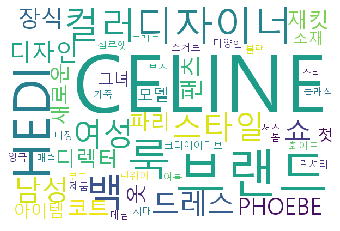

In [317]:
wc.generate_from_frequencies(dict(ADFN_rank[:50]))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('ce_ADFN_dropword50.png')

In [318]:
# wc.generate_from_frequencies(dict(noun_rank))

# plt.imshow(wc) 
# plt.axis('off') 
# plt.show()

# wc.to_file('twitter_noun_celine.png')

### rank 보기

In [319]:
ce_ADFN_rank_df = pd.DataFrame(ADFN_rank)

In [320]:
ce_ADFN_rank_df.columns = ['word', 'count']

In [321]:
ce_ADFN_rank_df.loc[:50]

,word,count
0,CELINE,1754
1,HEDI,511
2,브랜드,508
3,룩,355
4,디자이너,345
5,백,304
6,컬러,288
7,스타일,284
8,여성,283
9,드레스,271


In [322]:
ce_ADFN_rank_df['rank'] = range(1, 201)

In [323]:
ce_ADFN_rank_df = ce_ADFN_rank_df[['rank', 'word', 'count']]

In [325]:
ce_ADFN_rank_df.to_csv('./magazine/final/ce_ADFN_rank_dropword.csv', sep='|', encoding = 'utf-8', index = False)

In [ ]:
['LAURENT', 'SAINT', 'DIOR', '지방시', '바이', '안', '티', '재', '데', '가지']

In [324]:
ce_dwr.to_csv('./magazine/final/magazine_ce.csv', sep='|', encoding = 'utf-8', index = False)

In [121]:
for i in range(len(ADFN_df)):
    if '세' in ADFN_df.loc[i, 'noun']:
        print(i)

82
91
102
104
106
107
108
110
111
112
118
242
244
246
250
288
289
301
305
312
326
327
333
339
355
362
363
367
370
371
374
377
380
389
400
404
410
412
413
484
500
522
523
530
615
665
694
707
753
760
763


In [124]:
ADFN_df.loc[694, 'noun']

['시즌',
 '런웨이',
 '시선',
 '강탈',
 '세',
 '명의',
 '모델',
 '두',
 '엄마',
 '활동',
 '중국',
 '모델',
 '리나',
 'LINA',
 'ZHANG',
 '프로',
 '스쿨',
 '러',
 '세미',
 '익스',
 '클루',
 '시브',
 '시작',
 '메종',
 '마르지',
 '엘라',
 '발렌시아',
 '도시',
 '런웨이',
 '꾸준히',
 '성숙해진',
 '분위기',
 '시즌',
 '단연',
 '코',
 '독보',
 '오라',
 '발산',
 '밴드',
 '혁오',
 '스타일',
 '리스트',
 '김',
 '영은',
 '발렌시아',
 '만',
 '파리',
 '무대',
 '복귀',
 '모델',
 '강소영',
 'CELINE',
 '런웨이',
 '서프라이즈',
 '선사']

In [122]:
ce_dw.loc[371, 'link']

'https://www.fashionbiz.co.kr/article/view.asp?cate=1&sub_num=22&idx=164563'